# 1. Imports of essential modules/ Global settings

### 1.1 Modules

In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 1.2 Visualising settings

In [556]:
plt.style.use("dark_background")

# 2. Data upload from an external file & preprocessing raw data

### 2.1 Reading a file

In [557]:
df = pd.read_csv("./data/ALL_GPUs.CSV")

### 2.2 Selecting interesting parameters(columns)

In [558]:
columns = ["Best_Resolution", "Core_Speed", "Manufacturer", "Memory", "Memory_Bandwidth", 
           "Memory_Bus", "Memory_Speed","Release_Date"]

In [559]:
df = df[columns]

### 2.3 Adding an additional columns - Release based on an exact date

In [560]:
df['Release_Date'] = df['Release_Date'].str[1:-1]
df=df[df['Release_Date'].str.len()==11]
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%b-%Y')

In [561]:
release_year = df['Release_Date'].dt.year
release_month = df['Release_Date'].dt.month
release_day = df['Release_Date'].dt.day
df['Release_Year'] = release_year
df['Release'] = release_year + release_month/12 + release_day/30.4375 #30.4375 -> mean of all days in a single month

# 3. Memory speed 

### 3.1 Modification of original DataFrame

In [562]:
df['Memory_Speed_Value'] = df['Memory_Speed'].str[0:-3].fillna(0).astype(int)
df.head(5)

,Best_Resolution,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Release_Date,Release_Year,Release,Memory_Speed_Value
0,NaN,738 MHz,Nvidia,1024 MB,64GB/sec,256 Bit,1000 MHz,2009-03-01,2009,2009.282854,1000
1,1366 x 768,\n-,AMD,512 MB,106GB/sec,512 Bit,828 MHz,2007-05-14,2007,2007.876626,828
2,1366 x 768,\n-,AMD,512 MB,51.2GB/sec,256 Bit,800 MHz,2007-12-07,2007,2008.229979,800
3,1024 x 768,\n-,AMD,256 MB,36.8GB/sec,128 Bit,1150 MHz,2007-07-01,2007,2007.616188,1150
4,1024 x 768,\n-,AMD,256 MB,22.4GB/sec,128 Bit,700 MHz,2007-06-28,2007,2008.419918,700


In [563]:
X = df.iloc[:, [9]].values # 9 - columns index of Memory_Speed_Value
Y = df.iloc[:, 10].values

### 3.2 Full data visualisation on a plot

In [564]:
Y_pred = lin_regressor.predict(X)

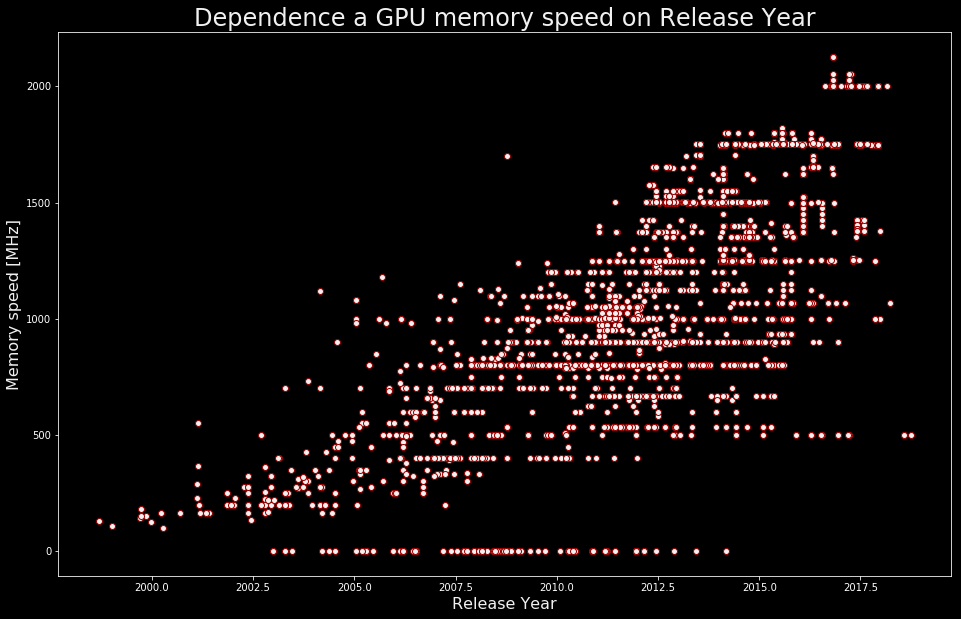

In [565]:
plt.figure(figsize=(16, 10))
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000")
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()

### 3.3 Computing an average per each year


In [566]:
X = df.iloc[:, [8]].values
X = np.unique(X)
X = X.reshape(-1, 1)

In [567]:
Y = []
for year in X:
    mean = df[df['Release_Year'] == year[0]]['Memory_Speed_Value'].mean()
    Y.append(mean)
Y = np.array(Y)

In [568]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

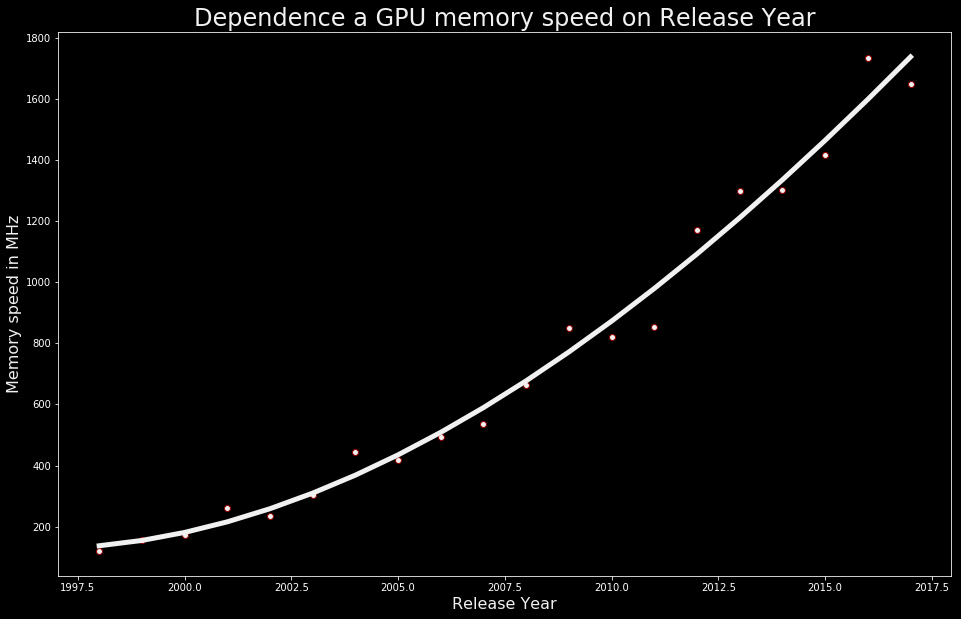

In [554]:
plt.figure(figsize=(16, 10))
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = '#f1f1f1', linewidth = 5)
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()